# A Tour of SciKit-Learn

When we talk about Data Science and the Data Science Pipeline, we are typically talking about the management of data flows for a specific purpose - the modeling of some hypothesis. The models that we construct can then be used in Data Products as an engine to create more data and actionable results. Machine learning is the art of training some model by using existing data along with a statistical method to create a parametric representation of a model that fits the data. That’s kind of a mouthful, but what that essentially means is that a machine learning algorithm uses statistical processes to learn from examples, then applies what it has learned to future inputs to predict an outcome.

Machine learning can classically be summarized with two methodologies: supervised and unsupervised learning. In supervised learning, the “correct answers” are annotated ahead of time and the algorithm tries to fit a decision space based on those answers. In unsupervised learning, algorithms try to group like examples together, inferring similarities via distance metrics. Machine learning allows us to handle new data in a meaningful way, predicting where new data will fit into our models. 

scikit-learn is a powerful machine learning library implemented in Python with numeric and scientific computing powerhouses NumPy, SciPy, and matplotlib for extremely fast analysis of small to medium sized data sets. It is open source, commercially usable and contains many modern machine learning algorithms for classification, regression, clustering, feature extraction, and optimization. For this reason scikit-learn is often the first tool in a Data Scientists toolkit for machine learning of incoming data sets. 

The purpose of this notebook is to serve as an introduction to machine learning with scikit-learn. We will explore several clustering, classification, and regression algorithms. In particular, we will structure our machine learning models as though we were producing a data product, an actionable model that can be used in larger programs or algorithms; rather than as simply a research or investigation methodology. For more on scikit-learn see: [Six Reasons why I recommend Scikit-Learn (O’Reilly Radar)](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html). 

In [1]:
%matplotlib inline

import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings from scikit-learn to make this notebook a bit nicer
warnings.simplefilter('ignore')

# Models may be implemented as pipelines
from sklearn.pipeline import Pipeline

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

# Visual analysis of model performance
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report
from yellowbrick.regressor import prediction_error, ResidualsPlot

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)

## Datasets

The datasets that come with `yellowbrick` demonstrate the properties of classification and regression algorithms, as well as how the data should fit. They are also small and are easy to train models that work. As such they are ideal for pedagogical purposes. The `sklearn.datasets` module also contains functions for loading data from the [mldata.org](http://mldata.org) repository as well as for generating random data.

For this notebook, we'll be using the following datasets:

### Regression

Regressions are a type of supervised learning algorithm, where, given continuous input data, the object is to fit a function that is able to predict the continuous value of input features. The regression dataset is designed to compute the compressive strength of concrete predicted from its age and ingredients.

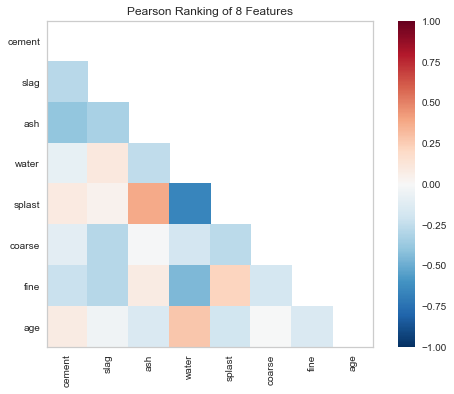

In [2]:
from yellowbrick.features import rank2d
from yellowbrick.datasets import load_concrete

Xr, yr = load_concrete()
Xr_train, Xr_test, yr_train, yr_test = tts(Xr, yr, test_size=0.2)

_ = rank2d(Xr, yr)

In [ ]:
# Run this cell if you want to learn more about the concrete dataset
ds = load_concrete(return_dataset=True)
print(ds.README)

### Classification

Classification is a supervised machine learning problem where, given labeled input data (with two or more labels), the task is to fit a function that can predict the discrete class of input data. For classification we'll explore two datasets for _binary_ and _multiclass_ classification.

For **binary classification** we'll use an occupancy dataset that predicts if a room is occupied or not from environmental sensors:

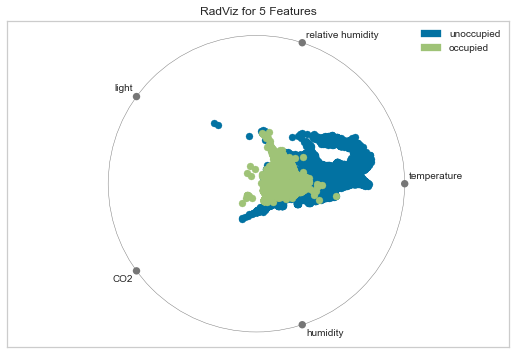

In [3]:
from yellowbrick.features import radviz
from yellowbrick.datasets import load_occupancy

BLBLS = ["unoccupied", "occupied"]

Xb, yb = load_occupancy()
Xb_train, Xb_test, yb_train, yb_test = tts(Xb, yb, test_size=0.2)


_ = radviz(Xb, yb, classes=BLBLS)

In [ ]:
# Run this cell if you want to learn more about the occupancy dataset
ds = load_occupancy(return_dataset=True)
print(ds.README)

For **multiclass classification** we'll use a game dataset that predicts the outcome of a connect-four game from a game state as win, loss, or draw:

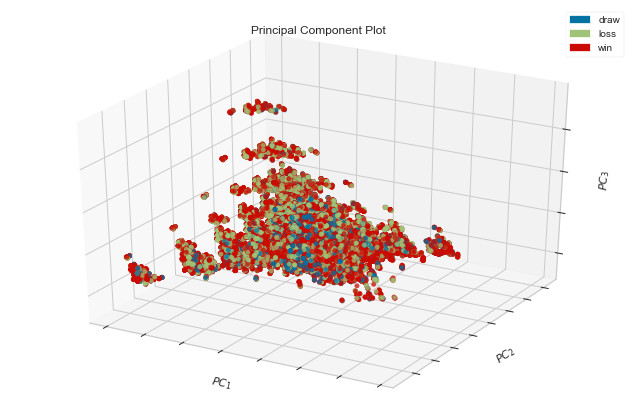

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from yellowbrick.features import pca_decomposition
from yellowbrick.datasets import load_game

MLBLS = ["draw", "loss", "win"]

# Note that the games dataset needs to be encoded categorically
Xm, ym = load_game()

Xm = OneHotEncoder().fit_transform(Xm).todense()
ym = LabelEncoder().fit_transform(ym)
Xm_train, Xm_test, ym_train, ym_test = tts(Xm, ym, test_size=0.2)

_ = pca_decomposition(Xm, ym, projection=3, classes=MLBLS)

In [ ]:
# Run this cell if you want to learn more about the game dataset
ds = load_game(return_dataset=True)
print(ds.README)

### Clustering

Clustering algorithms attempt to find patterns in unlabeled data. They are usually grouped into two main categories: centroidal (find the centers of clusters) and hierarchical (find clusters of clusters).

For clustering we'll use some generated datasets from scikit-learn: `make_blobs` and `make_moons` in order to most effectively demonstrate structural analysis in high dimensional space. Note that the below code is from `utils.py` in the same directory as this notebook and is just used here to visualize the clustering models that we'll be using - the code to generate the datasets using scikit-learn can be found in the clustering section below.

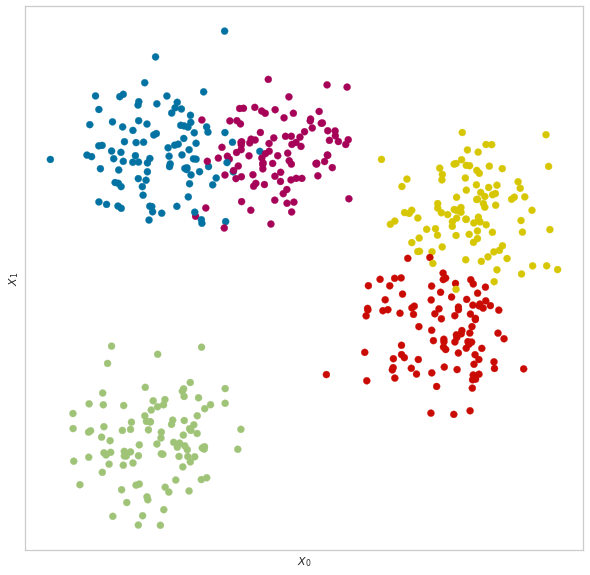

In [5]:
from utils import make_blobs, make_moons, draw_clusters

_ = draw_clusters(*make_blobs())

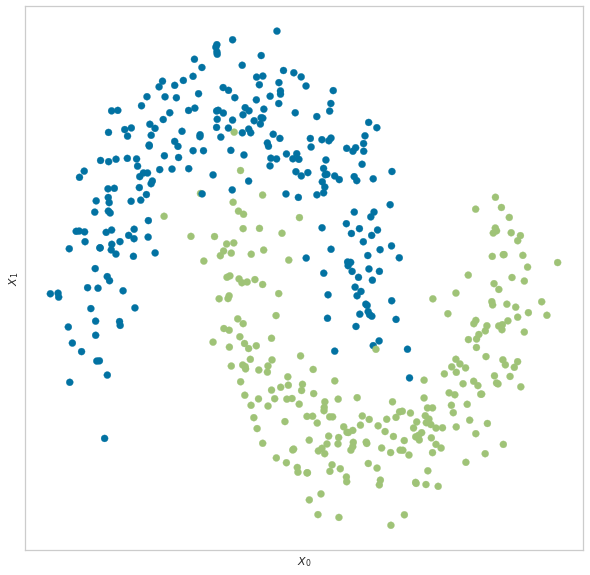

In [6]:
_ = draw_clusters(*make_moons())

## Generalized Linear Models

Generalized linear models are a parametric model that uses a linear combination of weights with features to make this type of regression prediction. GLMs can be used for both classification and regression problems and are supervised.

### Linear Regression
Linear regression fits a linear model (a line in two dimensions) to the data.

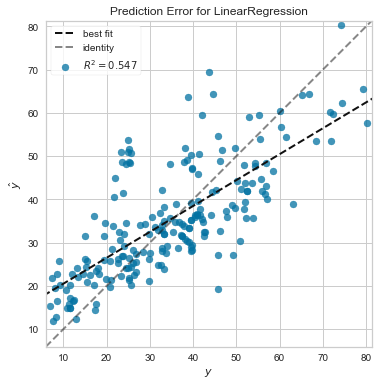

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xr_train, yr_train)

_, ax = plt.subplots(figsize=(9,6))
_ = prediction_error(model, Xr_test, yr_test, is_fitted=True, ax=ax)

### Stochastic Gradient Descent

Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. The partial_fit method allows online/out-of-core learning.

See also: `SGDClassifier`

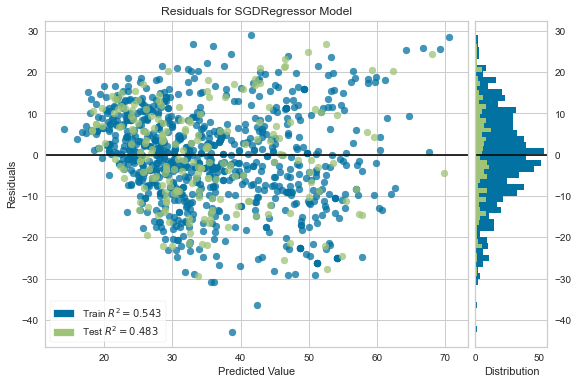

In [8]:
from sklearn.linear_model import SGDRegressor 

model = SGDRegressor(loss="huber", epsilon=1e-3)
oz = ResidualsPlot(model)

oz.fit(Xr_train, yr_train)
oz.score(Xr_test, yr_test)
_ = oz.show()

### Polynomial Regression

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data. If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, with a pipline.

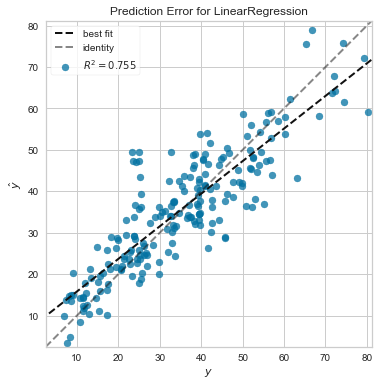

In [9]:
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ("poly", PolynomialFeatures(2)),
    ("reg", LinearRegression()),
])

model.fit(Xr_train, yr_train)

_, ax = plt.subplots(figsize=(9,6))
_ = prediction_error(model, Xr_test, yr_test, is_fitted=True, ax=ax)

### Perceptron

A primitive neural network that learns weights for input vectors and transfers the weights through a network to make a prediction. The line being fit in this case divides two groups of classes and is used only for _classification_.

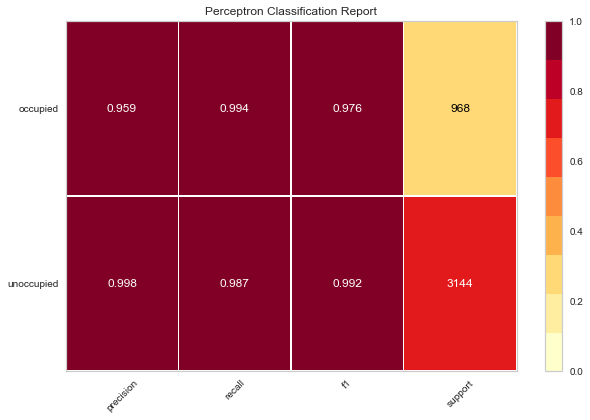

In [10]:
from sklearn.linear_model import Perceptron

model = Perceptron().fit(Xb_train, yb_train)
_ = classification_report(model, Xb_test, yb_test, classes=BLBLS, support=True, is_fitted=True)

### Logistic Regression

Fits a logistic model to data and makes predictions about the probability of a categorical event (between 0 and 1). Logistic regressions make predictions between 0 and 1, so in order to classify multiple classes a one-vs-all scheme is used (one model per class, winner-takes-all). LogisticRegression is used only for _classification_.

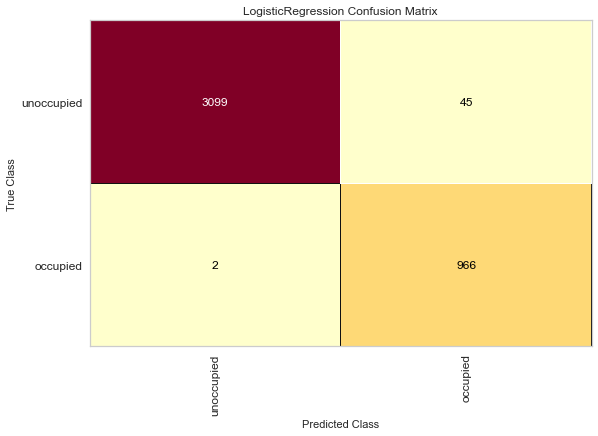

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xb_train, yb_train)

_ = confusion_matrix(model, Xb_test, yb_test, classes=BLBLS, is_fitted=True)

## Regularization

Regularization methods decrease the over-fitting of a model by penalizing complexity. These are usually demonstrated on regression algorithms, which is why they are included in this section.

### Ridge Regression

Also known as Tikhonov regularization penalizes a least squares regression model on the square of the absolute magnitiude of the coefficients (the L2 norm).

See also: `RidgeClassifier`

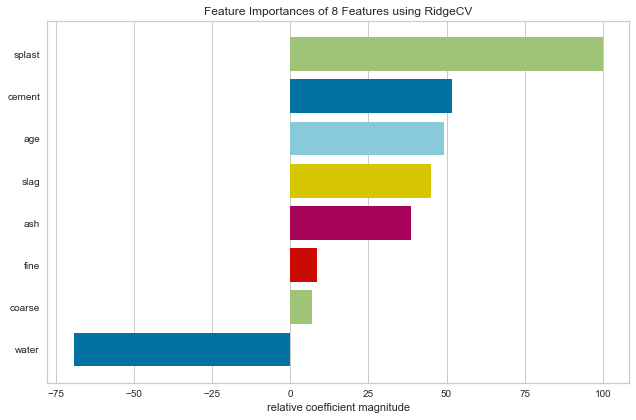

In [12]:
from sklearn.linear_model import RidgeCV
from yellowbrick.features import feature_importances

model = RidgeCV(alphas=np.logspace(-2, 10, 100))
model.fit(Xr, yr)

_ = feature_importances(model, Xr, yr)

### LASSO

Least Absolute Shrinkage and Selection Operator (LASSO) penalizes the least squares regression on the absolute magnitude of the coefficients (the L1 norm).

NOTE: for classification, Lasso regularization is implemented in the `SGDClassifier`

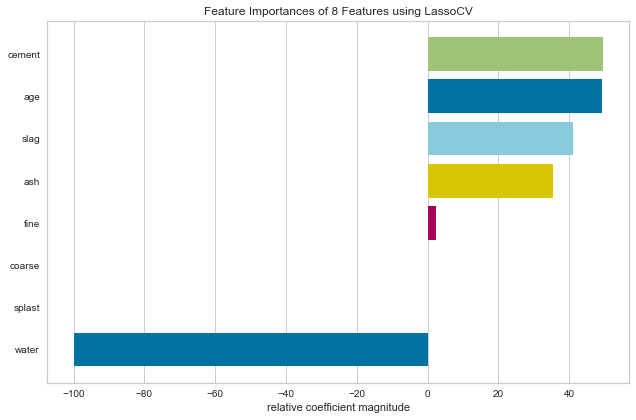

In [13]:
from sklearn.linear_model import LassoCV
from yellowbrick.features import feature_importances

model = LassoCV(alphas=np.logspace(-2, 10, 100))
model.fit(Xr, yr)

_ = feature_importances(model, Xr, yr)

### ElasticNet

ElasticNet penalizes the model with both L1 and L2 regularization allowing for sparse model learning like Lasso, while maintaining the regularization properties of Ridge. We control the regularization using the `l1_ratio` parameter.

NOTE: for classification, ElasticNet regularization is implemented in the `SGDClassifier`

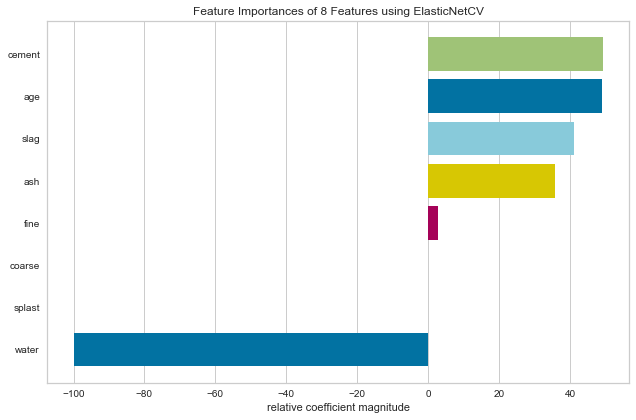

In [14]:
from sklearn.linear_model import ElasticNetCV
from yellowbrick.features import feature_importances

model = ElasticNetCV(alphas=np.logspace(-2, 10, 100), l1_ratio=0.75)
model.fit(Xr, yr)

_ = feature_importances(model, Xr, yr)

## Nearest Neighbors

Find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.

Nearest neighbors can be used for unsupervised analysis (e.g. similarity finding), classification, and regression.

### Unsupervised k-Nearest Neighbors

In [15]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(Xr)

# Get the distances and 4 closest concrete mixtures to the first concrete mixture instance
distances, indices = nbrs.kneighbors(Xr.iloc[0:1,:])
for i, d in np.ndenumerate(distances):
    print("concrete {} distance {}".format(indices[i], d))

concrete 0 distance 0.0
concrete 1 distance 15.0
concrete 405 distance 47.468410548490034
concrete 401 distance 66.9776081985614


### k-Nearest Neighbor Regression

Makes predictions by locating similar cases and returning the average majority.

See also: `KNeighborsClassifier`

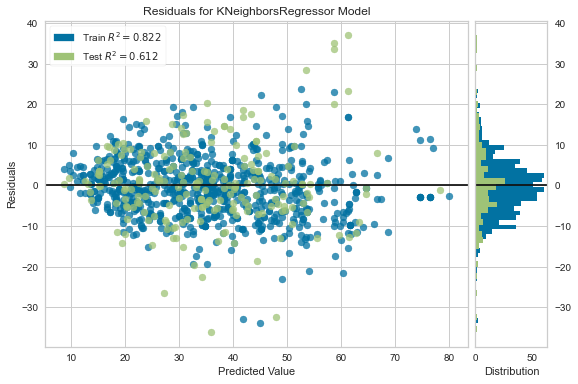

In [16]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
oz = ResidualsPlot(model)

oz.fit(Xr_train, yr_train)
oz.score(Xr_test, yr_test)
_ = oz.show()

### Radius Neighbors Classification 

Make predictions by locating similar cases within a fixed distance and return a vote for the class. 

See also: `RadiusNeighborsRegressor`

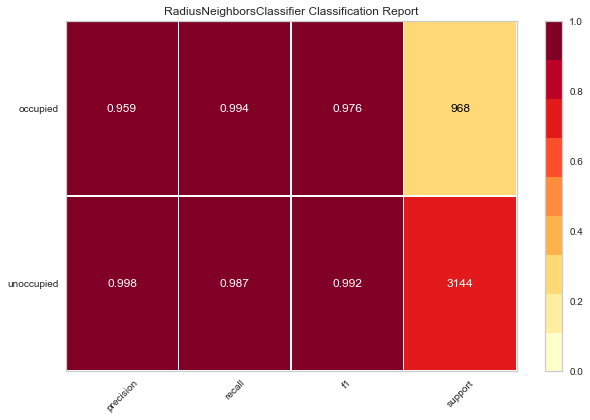

In [29]:
from sklearn.neighbors import RadiusNeighborsClassifier

model = RadiusNeighborsClassifier(radius=35.0, p=4, outlier_label="most_frequent").fit(Xb_train, yb_train)
_ = classification_report(model, Xb_test, yb_test, classes=BLBLS, support=True, is_fitted=True)

## Classification and Regression Trees (CART)

Makes splits of the best separation of the data for the predictions being made. Used for both regression and classification.

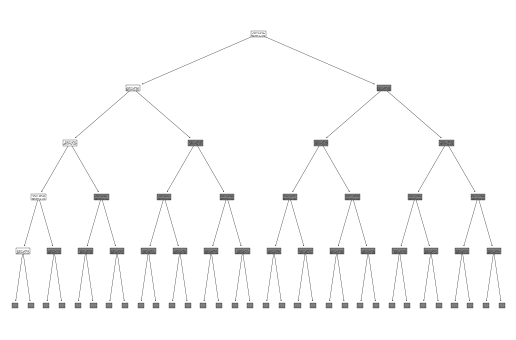

In [33]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

model = DecisionTreeRegressor()
model.fit(Xr, yr)

_ = plot_tree(model, max_depth=4)

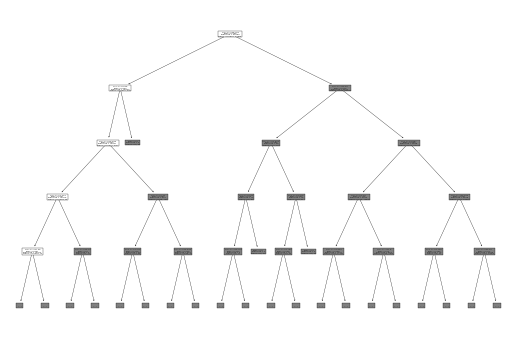

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier().fit(Xb, yb)
_ = plot_tree(model, max_depth=4)

## Tree Ensembles

Ensemble learning methods are effective at correcting for decision trees' habit of overfitting to their training set. The model fits a number of weak learners either sequentially or in parallel and then builds a meta-model from the underlying learners. 

### Random Forest

Random forest is an ensemble method that creates a number of decision trees using the CART algorithm, each on a different subset of the data. The general approach to creating the ensemble is bootstrap aggregation of the decision trees (bagging).

See also: `RandomForestClassifier`

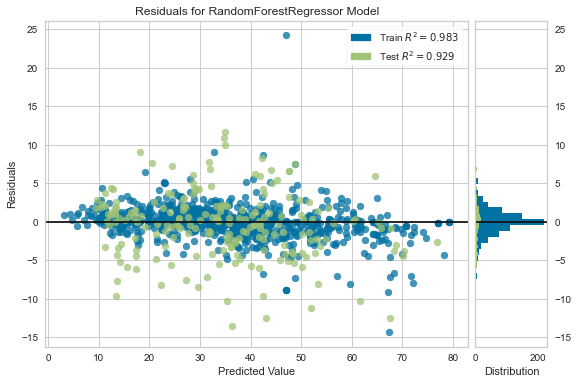

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
oz = ResidualsPlot(model)

oz.fit(Xr_train, yr_train)
oz.score(Xr_test, yr_test)
_ = oz.show()

### AdaBoost

Adaptive Boosting (AdaBoost) is an ensemble method that sums the predictions made by multiple decision trees. Additional models are added and trained on instances that were incorrectly predicted (boosting).

See also: `AdaBoostRegressor`

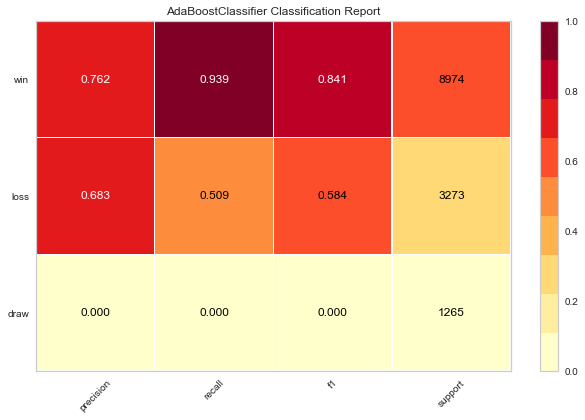

In [36]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=25).fit(Xm_train, ym_train)
_ = classification_report(model, Xm_test, ym_test, classes=MLBLS, support=True, is_fitted=True)

### Gradient Boosting

Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions.

See also: `GradientBoostingRegressor`

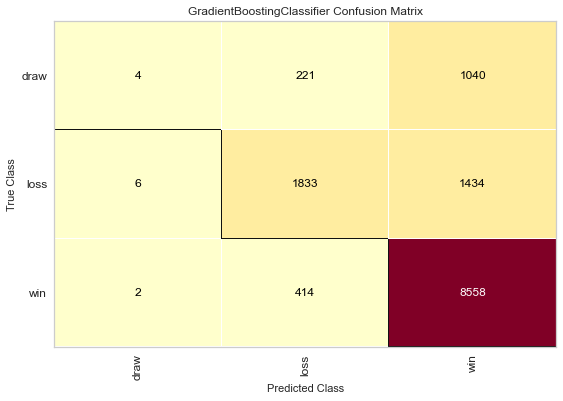

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=25).fit(Xm_train, ym_train)
_ = confusion_matrix(model, Xm_test, ym_test, classes=MLBLS, support=True, is_fitted=True)

## Support Vector Machines

Uses the SVM algorithm (transforming the problem space into higher dimensions in order to use kernel methods) to make predictions for a linear function. Used for both classification and regression.

Kernels: linear, polynomial, radial basis function

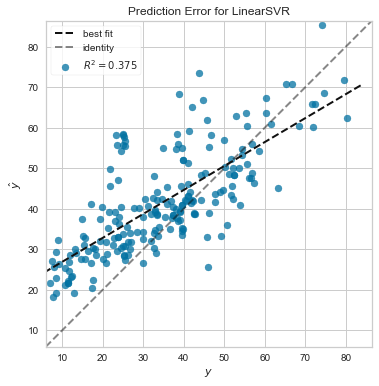

In [40]:
from sklearn.svm import LinearSVR

model = LinearSVR()
model.fit(Xr_train, yr_train)

_ = prediction_error(model, Xr_test, yr_test, is_fitted=True)

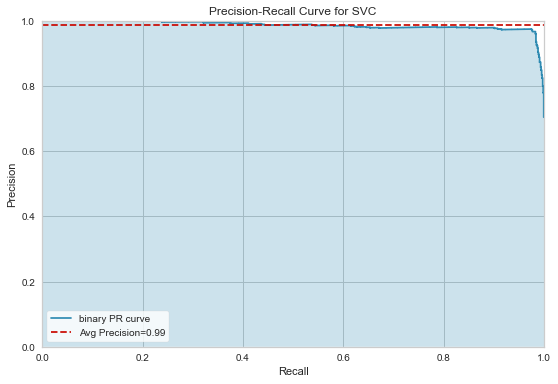

In [47]:
from sklearn.svm import SVC
from yellowbrick.classifier import precision_recall_curve

model = SVC(kernel="rbf", gamma=0.1)
model.fit(Xb_train, yb_train)

_ = precision_recall_curve(model, Xb_test, yb_test, is_fitted=True, classes=BLBLS)

## Bayesian Methods

Directly apply Bayes rule with conditional probabilities for classification.

### Naive Bayes

Uses Bayes Theorem (with a naive assumption) to model the conditional relationship of each attribute to the class.

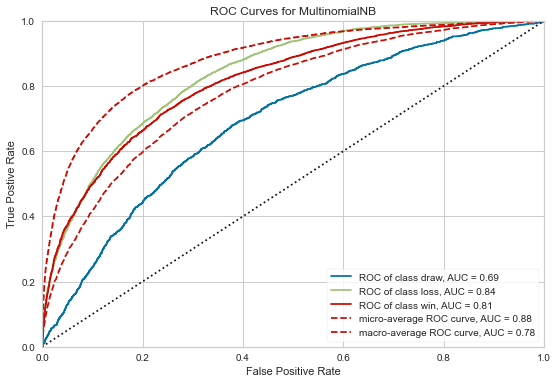

In [49]:
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.classifier import roc_auc

model = MultinomialNB()
model.fit(Xm_train, ym_train)

_ = roc_auc(model, Xm_test, ym_test, is_fitted=True, classes=MLBLS)

### Linear Discriminant Analysis

Linear Discriminate Analysis (LDA) fits a conditional probability density function (Gaussian) to the attributes of the classes. The discrimination function is linear.

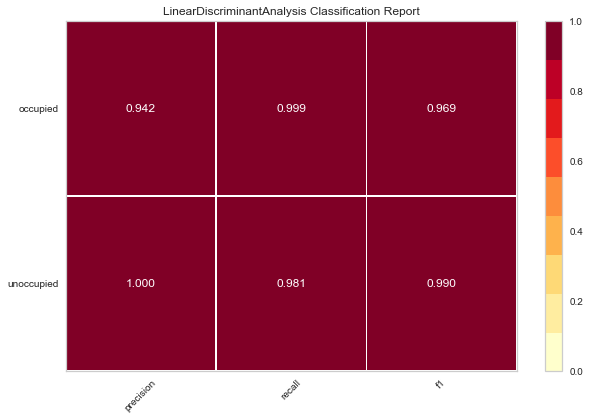

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model      = LinearDiscriminantAnalysis()
model.fit(Xb_train, yb_train)

_ = classification_report(model, Xb_test, yb_test, is_fitted=True, classes=BLBLS)

## Clustering

Clustering algorithms attempt to find patterns in unlabeled data. They are usually grouped into two main categories: centroidal (find the centers of clusters) and hierarchical (find clusters of clusters).

### K-Means Clustering

Partition N samples into k clusters, where each sample belongs to a cluster to which it has the closest mean of the neighbors. This problem is NP-hard, but there are good estimations.

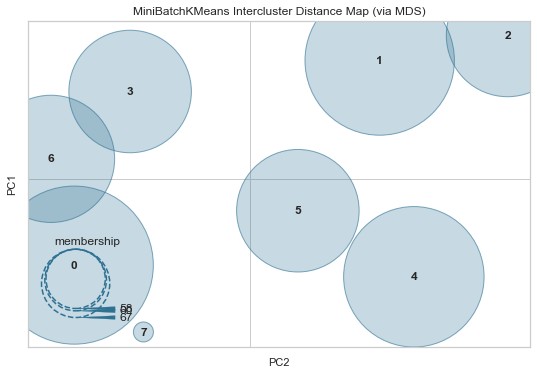

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import ICDM

X, _ = make_blobs(n_samples=500, centers=8, cluster_std=1.95)

oz = ICDM(MiniBatchKMeans())
oz.fit(X)
_ = oz.show()

## Affinity Propagation

Clustering based on the concept of "message passing" between data points. Unlike clustering algorithms such as k-means or k-medoids, AP does not require the number of clusters to be determined or estimated before running the algorithm. Like k-medoids, AP finds "exemplars", members of the input set that are representative of clusters

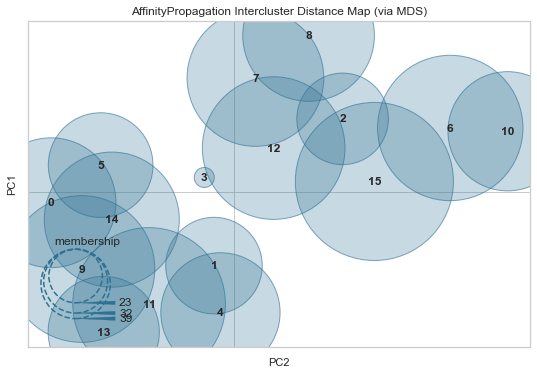

In [56]:
from sklearn.cluster import AffinityPropagation

oz = ICDM(AffinityPropagation())
oz.fit(X)
_ = oz.show()